In [2]:
print("ok")

ok


In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")

In [52]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
)

In [53]:
res = llm.invoke("hi")

In [54]:
res

AIMessage(content='Hi there! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--3c284f5e-a49d-4ba5-8f5f-638d4806210a-0', usage_metadata={'input_tokens': 2, 'output_tokens': 34, 'total_tokens': 36, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 24}})

In [55]:
from langchain.tools import tool

@tool
def multiply(a: int, b: int) -> int:
    '''
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    '''
    return a * b

@tool
def divide(a: int, b: int) -> float:
    '''
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator.

    Returns:
        float: The result of a divided by b.
    '''
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b

@tool
def sum(a: int, b: int) -> int:
    '''
    Sum two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    '''
    return a + b


In [56]:
from langchain_community.tools import DuckDuckGoSearchRun
search=DuckDuckGoSearchRun()

In [57]:
tools = [multiply, divide, sum, search]
llm_with_tools = llm.bind_tools(tools)

In [58]:
response=llm_with_tools.invoke("What is 25 multiplied by 4?")

In [59]:
print(response.content)


In [60]:
print(response.tool_calls)

[{'name': 'multiply', 'args': {'b': 4.0, 'a': 25.0}, 'id': '95c48914-867e-4080-86f3-9a6ac155eb7d', 'type': 'tool_call'}]


In [61]:
response=llm_with_tools.invoke("How much is the net worth of Elon Musk, and divide it by 2?")

In [62]:
response.content

''

In [63]:
response.tool_calls

[{'name': 'duckduckgo_search',
  'args': {'query': 'Elon Musk net worth'},
  'id': '76b9e16b-4757-4ca1-ab11-8d4a90a1d4b3',
  'type': 'tool_call'}]

In [64]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START

SYSTEM_PROMPT="You are a helpful assistant tasked with using search and performing arithmetic on a set of inputs."

def function_1(state:MessagesState):
    user_question=state["messages"]
    input_question=[SYSTEM_PROMPT]+user_question
    response=llm_with_tools.invoke(input_question)
    return {"messages":[response]}

builder=StateGraph(MessagesState)

builder.add_node("llm_decision_step", function_1)   

from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"llm_decision_step")

from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition,
)

builder.add_edge("tools","llm_decision_step")

react_graph=builder.compile()

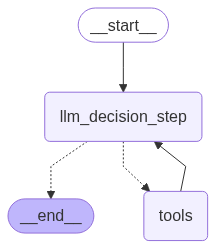

In [65]:
react_graph

In [ ]:
message = [HumanMessage(content="How much is the net worth of Elon Musk, and divide it by 2?")]
react_graph.invoke({"messages":message})

c:\Users\SRJ\SRJ\Work\agentic_ai\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content='How much is the net worth of Elon Musk, and divide it by 2?', additional_kwargs={}, response_metadata={}, id='e7874a8c-cdf8-4d3a-bbd8-e6567026b628'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'duckduckgo_search', 'arguments': '{"query": "Elon Musk net worth"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--1a386ecd-b339-4f7c-8cf5-33a73371e8ec-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Elon Musk net worth'}, 'id': '76c2fb52-e061-4e58-8442-c07d6a5b2835', 'type': 'tool_call'}], usage_metadata={'input_tokens': 353, 'output_tokens': 104, 'total_tokens': 457, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 84}}),
  ToolMessage(content="Browse today’s rankings of the wealthiest people and families globally. Discover the net worth, age, and other inform

In [68]:
message = [HumanMessage(content="Current age of TATA group")]
react_graph.invoke({"messages":message})

c:\Users\SRJ\SRJ\Work\agentic_ai\venv\Lib\site-packages\langchain_community\utilities\duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


{'messages': [HumanMessage(content='Current age of TATA group', additional_kwargs={}, response_metadata={}, id='e3fc8739-7f10-41eb-b6e7-9facb737a8c7'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'duckduckgo_search', 'arguments': '{"query": "Current age of TATA group"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--af401a0c-3e70-45a2-8c6a-f048bcd1da08-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Current age of TATA group'}, 'id': 'bfcb69b8-4af6-4a56-aeef-15a3e8d166f4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 342, 'output_tokens': 111, 'total_tokens': 453, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 89}}),
  ToolMessage(content='Aug 7, 2023 · current，作名词译为（水，气，电）流；趋势；作形容词译为现在的；流通的。 读音：英[ˈkʌrənt]，美[ˈkɜːrənt]。 释义： adj.现在的；流通的，通用的；最近的；草写的。 n.（水， … A new report released